In [ ]:
import numpy as np
import configparser

from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.utils.vis_utils import plot_model as plot
from tensorflow.keras.optimizers import SGD

import sys
sys.path.insert(0, './lib/')

#function to obtain data for training/testing (validation)

#Define the neural network
def get_unet1(n_ch,patch_height,patch_width):
    inputs = Input(shape=(n_ch,patch_height,patch_width))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same',data_format='channels_first')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same',data_format='channels_first')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    #
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same',data_format='channels_first')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same',data_format='channels_first')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    #
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same',data_format='channels_first')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same',data_format='channels_first')(conv3)

    up1 = UpSampling2D(size=(2, 2))(conv3)
    up1 = concatenate([conv2,up1],axis=1)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same',data_format='channels_first')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same',data_format='channels_first')(conv4)
    #
    up2 = UpSampling2D(size=(2, 2))(conv4)
    up2 = concatenate([conv1,up2], axis=1)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same',data_format='channels_first')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same',data_format='channels_first')(conv5)
    #
    conv6 = Conv2D(2, (1, 1), activation='relu',padding='same',data_format='channels_first')(conv5)
    conv6 = core.Reshape((2,patch_height*patch_width))(conv6)
    conv6 = core.Permute((2,1))(conv6)
    ############
    conv7 = core.Activation('softmax')(conv6)

    model = Model(inputs=inputs, outputs=conv7)

    # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.3, nesterov=False)
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

    return model
def get_unet(minimum_kernel=32, do=0, activation=ReLU, iteration=1):
    inputs = Input((None, None, 3))
    conv1 = Dropout(do)(activation()(Conv2D(minimum_kernel, (3, 3), padding='same')(inputs)))
    conv1 = Dropout(do)(activation()(Conv2D(minimum_kernel, (3, 3), padding='same')(conv1)))
    a = conv1
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Dropout(do)(activation()(Conv2D(minimum_kernel * 2, (3, 3), padding='same')(pool1)))
    conv2 = Dropout(do)(activation()(Conv2D(minimum_kernel * 2, (3, 3), padding='same')(conv2)))
    b = conv2
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Dropout(do)(activation()(Conv2D(minimum_kernel * 4, (3, 3), padding='same')(pool2)))
    conv3 = Dropout(do)(activation()(Conv2D(minimum_kernel * 4, (3, 3), padding='same')(conv3)))
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Dropout(do)(activation()(Conv2D(minimum_kernel * 8, (3, 3), padding='same')(pool3)))
    conv4 = Dropout(do)(activation()(Conv2D(minimum_kernel * 8, (3, 3), padding='same')(conv4)))
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Dropout(do)(activation()(Conv2D(minimum_kernel * 16, (3, 3), padding='same')(pool4)))
    conv5 = Dropout(do)(activation()(Conv2D(minimum_kernel * 16, (3, 3), padding='same')(conv5)))

    up6 = concatenate([Conv2DTranspose(minimum_kernel * 8, (2, 2), strides=(2, 2), padding='same')(conv5), conv4],
                      axis=3)
    conv6 = Dropout(do)(activation()(Conv2D(minimum_kernel * 8, (3, 3), padding='same')(up6)))
    conv6 = Dropout(do)(activation()(Conv2D(minimum_kernel * 8, (3, 3), padding='same')(conv6)))

    up7 = concatenate([Conv2DTranspose(minimum_kernel * 4, (2, 2), strides=(2, 2), padding='same')(conv6), conv3],
                      axis=3)
    conv7 = Dropout(do)(activation()(Conv2D(minimum_kernel * 4, (3, 3), padding='same')(up7)))
    conv7 = Dropout(do)(activation()(Conv2D(minimum_kernel * 4, (3, 3), padding='same')(conv7)))

    up8 = concatenate([Conv2DTranspose(minimum_kernel * 2, (2, 2), strides=(2, 2), padding='same')(conv7), conv2],
                      axis=3)
    conv8 = Dropout(do)(activation()(Conv2D(minimum_kernel * 2, (3, 3), padding='same')(up8)))
    conv8 = Dropout(do)(activation()(Conv2D(minimum_kernel * 2, (3, 3), padding='same')(conv8)))

    up9 = concatenate([Conv2DTranspose(minimum_kernel, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Dropout(do)(activation()(Conv2D(minimum_kernel, (3, 3), padding='same')(up9)))
    conv9 = Dropout(do)(activation()(Conv2D(minimum_kernel, (3, 3), padding='same')(conv9)))

    pt_conv1a = Conv2D(minimum_kernel, (3, 3), padding='same')
    pt_activation1a = activation()
    pt_dropout1a = Dropout(do)
    pt_conv1b = Conv2D(minimum_kernel, (3, 3), padding='same')
    pt_activation1b = activation()
    pt_dropout1b = Dropout(do)
    pt_pooling1 = MaxPooling2D(pool_size=(2, 2))

    pt_conv2a = Conv2D(minimum_kernel * 2, (3, 3), padding='same')
    pt_activation2a = activation()
    pt_dropout2a = Dropout(do)
    pt_conv2b = Conv2D(minimum_kernel * 2, (3, 3), padding='same')
    pt_activation2b = activation()
    pt_dropout2b = Dropout(do)
    pt_pooling2 = MaxPooling2D(pool_size=(2, 2))

    pt_conv3a = Conv2D(minimum_kernel * 4, (3, 3), padding='same')
    pt_activation3a = activation()
    pt_dropout3a = Dropout(do)
    pt_conv3b = Conv2D(minimum_kernel * 4, (3, 3), padding='same')
    pt_activation3b = activation()
    pt_dropout3b = Dropout(do)

    pt_tranconv8 = Conv2DTranspose(minimum_kernel * 2, (2, 2), strides=(2, 2), padding='same')
    pt_conv8a = Conv2D(minimum_kernel * 2, (3, 3), padding='same')
    pt_activation8a = activation()
    pt_dropout8a = Dropout(do)
    pt_conv8b = Conv2D(minimum_kernel * 2, (3, 3), padding='same')
    pt_activation8b = activation()
    pt_dropout8b = Dropout(do)

    pt_tranconv9 = Conv2DTranspose(minimum_kernel, (2, 2), strides=(2, 2), padding='same')
    pt_conv9a = Conv2D(minimum_kernel, (3, 3), padding='same')
    pt_activation9a = activation()
    pt_dropout9a = Dropout(do)
    pt_conv9b = Conv2D(minimum_kernel, (3, 3), padding='same')
    pt_activation9b = activation()
    pt_dropout9b = Dropout(do)

    conv9s = [conv9]
    outs = []
    a_layers = [a]
    for iteration_id in range(iteration):
        out = Conv2D(1, (1, 1), activation='sigmoid', name=f'out1{iteration_id + 1}')(conv9s[-1])
        outs.append(out)

        model = Model(inputs=[inputs], outputs=[outs[-1]])
        count = 0
        for i, layer in enumerate(model.layers):
            if not layer.name.startswith('out'):
                count += 1

        conv1 = pt_dropout1a(pt_activation1a(pt_conv1a(conv9s[-1])))
        conv1 = pt_dropout1b(pt_activation1b(pt_conv1b(conv1)))
        a_layers.append(conv1)
        conv1 = concatenate(a_layers, axis=3)
        conv1 = Conv2D(minimum_kernel, (1, 1), padding='same')(conv1)
        pool1 = pt_pooling1(conv1)

        conv2 = pt_dropout2a(pt_activation2a(pt_conv2a(pool1)))
        conv2 = pt_dropout2b(pt_activation2b(pt_conv2b(conv2)))
        pool2 = pt_pooling2(conv2)

        conv3 = pt_dropout3a(pt_activation3a(pt_conv3a(pool2)))
        conv3 = pt_dropout3b(pt_activation3b(pt_conv3b(conv3)))

        up8 = concatenate([pt_tranconv8(conv3), conv2], axis=3)
        conv8 = pt_dropout8a(pt_activation8a(pt_conv8a(up8)))
        conv8 = pt_dropout8b(pt_activation8b(pt_conv8b(conv8)))

        up9 = concatenate([pt_tranconv9(conv8), conv1], axis=3)
        conv9 = pt_dropout9a(pt_activation9a(pt_conv9a(up9)))
        conv9 = pt_dropout9b(pt_activation9b(pt_conv9b(conv9)))

        conv9s.append(conv9)

    out2 = Conv2D(1, (1, 1), activation='sigmoid', name='final_out')(conv9)
    outs.append(out2)

    model = Model(inputs=[inputs], outputs=outs)
    count = 0
    for i, layer in enumerate(model.layers):
        if not layer.name.startswith('model1_') and not layer.name.startswith('out'):
            layer.name = layer.name[:layer.name.rfind('_')]
            layer.name = f'model2_{layer.name}_{count}'
            count += 1

    loss_funcs = {}
    for iteration_id in range(iteration):
        loss_funcs.update({f'out1{iteration_id + 1}': losses.binary_crossentropy})
    loss_funcs.update({'final_out': losses.binary_crossentropy})

    metrics = {
        "final_out": ['accuracy']
    }

    model.compile(optimizer=Adam(lr=1e-3), loss=loss_funcs, metrics=metrics)

    return model

#Define the neural network gnet
#you need change function call "get_unet" to "get_gnet" in line 166 before use this network
def get_gnet(n_ch,patch_height,patch_width):
    inputs = Input((n_ch, patch_height, patch_width))
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    up1 = UpSampling2D(size=(2, 2))(conv1)
    #
    conv2 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(up1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #
    conv3 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(pool1)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool2)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv4)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #
    conv5 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool3)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv5)
    #
    up2 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up2)
    conv6 = Dropout(0.2)(conv6)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv6)
    #
    up3 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up3)
    conv7 = Dropout(0.2)(conv7)
    conv7 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv7)
    #
    up4 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(up4)
    conv8 = Dropout(0.2)(conv8)
    conv8 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv8)
    #
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv8)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(pool4)
    conv9 = Dropout(0.2)(conv9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv9)
    #
    conv10 = Convolution2D(2, 1, 1, activation='relu', border_mode='same')(conv9)
    conv10 = core.Reshape((2,patch_height*patch_width))(conv10)
    conv10 = core.Permute((2,1))(conv10)
    ############
    conv10 = core.Activation('softmax')(conv10)

    model = Model(input=inputs, output=conv10)

    # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.3, nesterov=False)
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

    return model

#========= Load settings from Config file
config = configparser.RawConfigParser()
config.read('configuration.txt')
#patch to the datasets
path_data = config.get('data paths', 'path_local')
#Experiment name
name_experiment = config.get('experiment name', 'name')
#training settings
N_epochs = int(config.get('training settings', 'N_epochs'))
batch_size = int(config.get('training settings', 'batch_size'))

#============ Load the data and divided in patches
patches_imgs_train, patches_masks_train = get_data_training(
    DRIVE_train_imgs_original = path_data + config.get('data paths', 'train_imgs_original'),
    DRIVE_train_groudTruth = path_data + config.get('data paths', 'train_groundTruth'),  #masks
    patch_height = int(config.get('data attributes', 'patch_height')),
    patch_width = int(config.get('data attributes', 'patch_width')),
    N_subimgs = int(config.get('training settings', 'N_subimgs')),
    inside_FOV = config.getboolean('training settings', 'inside_FOV') #select the patches only inside the FOV  (default == True)
)

#========= Save a sample of what you're feeding to the neural network ==========
N_sample = min(patches_imgs_train.shape[0],40)
visualize(group_images(patches_imgs_train[0:N_sample,:,:,:],5),'/content'+'/'+"sample_input_imgs")#.show()
visualize(group_images(patches_masks_train[0:N_sample,:,:,:],5),'/content'+'/'+"sample_input_masks")#.show()


#=========== Construct and save the model arcitecture =====
n_ch = patches_imgs_train.shape[1]
patch_height = patches_imgs_train.shape[2]
patch_width = patches_imgs_train.shape[3]
#model = get_unet(n_ch, patch_height, patch_width)  #the U-net model
model=get_unet()
print ("Check: final output of the network:")
print (model.output_shape)
plot(model, to_file='/content'+'/'+name_experiment + '_model.png')   #check how the model looks like
json_string = model.to_json()
open('/content'+'/'+name_experiment +'_architecture.json', 'w').write(json_string)



#============  Training ==================================
checkpointer = ModelCheckpoint(filepath='./'+name_experiment+'/'+name_experiment +'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased


# def step_decay(epoch):
#     lrate = 0.01 #the initial learning rate (by default in keras)
#     if epoch==100:
#         return 0.005
#     else:
#         return lrate
#
# lrate_drop = LearningRateScheduler(step_decay)

patches_masks_train = masks_Unet(patches_masks_train)  #reduce memory consumption
model.fit(patches_imgs_train, patches_masks_train, epochs=N_epochs, batch_size=batch_size, verbose=2, shuffle=True, validation_split=0.1, callbacks=[checkpointer])


#========== Save and test the last model ===================
model.save_weights('./'+name_experiment+'/'+name_experiment +'_last_weights.h5', overwrite=True)
#test the model
# score = model.evaluate(patches_imgs_test, masks_Unet(patches_masks_test), verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

NameError: ignored

In [1]:
import numpy as np
import configparser

from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.utils.vis_utils import plot_model as plot
from tensorflow.keras.optimizers import SGD

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import h5py 
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def load_hdf5(infile):
  with h5py.File(infile,"r") as f:  #"with" close the file after its nested commands
    return f["image"][()]

def write_hdf5(arr,outfile):
  with h5py.File(outfile,"w") as f:
    f.create_dataset("image", data=arr, dtype=arr.dtype)

#convert RGB image in black and white
def rgb2gray(rgb):
    assert (len(rgb.shape)==4)  #4D arrays
    assert (rgb.shape[1]==3)
    bn_imgs = rgb[:,0,:,:]*0.299 + rgb[:,1,:,:]*0.587 + rgb[:,2,:,:]*0.114
    bn_imgs = np.reshape(bn_imgs,(rgb.shape[0],1,rgb.shape[2],rgb.shape[3]))
    return bn_imgs

#group a set of images row per columns
def group_images(data,per_row):
    assert data.shape[0]%per_row==0
    assert (data.shape[1]==1 or data.shape[1]==3)
    data = np.transpose(data,(0,2,3,1))  #corect format for imshow
    all_stripe = []
    for i in range(int(data.shape[0]/per_row)):
        stripe = data[i*per_row]
        for k in range(i*per_row+1, i*per_row+per_row):
            stripe = np.concatenate((stripe,data[k]),axis=1)
        all_stripe.append(stripe)
    totimg = all_stripe[0]
    for i in range(1,len(all_stripe)):
        totimg = np.concatenate((totimg,all_stripe[i]),axis=0)
    return totimg

#visualize image (as PIL image, NOT as matplotlib!)
def visualize(data,filename):
    assert (len(data.shape)==3) #height*width*channels
    img = None
    if data.shape[2]==1:  #in case it is black and white
        data = np.reshape(data,(data.shape[0],data.shape[1]))
    if np.max(data)>1:
        img = Image.fromarray(data.astype(np.uint8))   #the image is already 0-255
    else:
        img = Image.fromarray((data*255).astype(np.uint8))  #the image is between 0-1
    img.save(filename + '.png')
    return img

#prepare the mask in the right shape for the Unet
def masks_Unet(masks):
    assert (len(masks.shape)==4)  #4D arrays
    assert (masks.shape[1]==1 )  #check the channel is 1
    im_h = masks.shape[2]
    im_w = masks.shape[3]
    masks = np.reshape(masks,(masks.shape[0],im_h*im_w))
    new_masks = np.empty((masks.shape[0],im_h*im_w,2))
    for i in range(masks.shape[0]):
        for j in range(im_h*im_w):
            if  masks[i,j] == 0:
                new_masks[i,j,0]=1
                new_masks[i,j,1]=0
            else:
                new_masks[i,j,0]=0
                new_masks[i,j,1]=1
    return new_masks

def pred_to_imgs(pred, patch_height, patch_width, mode="original"):
    assert (len(pred.shape)==3)  #3D array: (Npatches,height*width,2)
    assert (pred.shape[2]==2 )  #check the classes are 2
    pred_images = np.empty((pred.shape[0],pred.shape[1]))  #(Npatches,height*width)
    if mode=="original":
        for i in range(pred.shape[0]):
            for pix in range(pred.shape[1]):
                pred_images[i,pix]=pred[i,pix,1]
    elif mode=="threshold":
        for i in range(pred.shape[0]):
            for pix in range(pred.shape[1]):
                if pred[i,pix,1]>=0.5:
                    pred_images[i,pix]=1
                else:
                    pred_images[i,pix]=0
    else:
        print ("mode " +str(mode) +" not recognized, it can be 'original' or 'threshold'")
        exit()
    pred_images = np.reshape(pred_images,(pred_images.shape[0],1, patch_height, patch_width))
    return pred_images

In [5]:
import numpy as np
import random
import configparser

#To select the same images
# random.seed(10)

#Load the original data and return the extracted patches for training/testing
def get_data_training(DRIVE_train_imgs_original,
                      DRIVE_train_groudTruth,
                      patch_height,
                      patch_width,
                      N_subimgs,
                      inside_FOV):
    train_imgs_original = load_hdf5(DRIVE_train_imgs_original)
    train_masks = load_hdf5(DRIVE_train_groudTruth) #masks always the same
    # visualize(group_images(train_imgs_original[0:20,:,:,:],5),'imgs_train')#.show()  #check original imgs train


    train_imgs = my_PreProc(train_imgs_original)
    train_masks = train_masks/255.

    train_imgs = train_imgs[:,:,9:574,:]  #cut bottom and top so now it is 565*565
    train_masks = train_masks[:,:,9:574,:]  #cut bottom and top so now it is 565*565
    data_consistency_check(train_imgs,train_masks)

    #check masks are within 0-1
    assert(np.min(train_masks)==0 and np.max(train_masks)==1)

    print ("\ntrain images/masks shape:")
    print (train_imgs.shape)
    print ("train images range (min-max): " +str(np.min(train_imgs)) +' - '+str(np.max(train_imgs)))
    print ("train masks are within 0-1\n")

    #extract the TRAINING patches from the full images
    patches_imgs_train, patches_masks_train = extract_random(train_imgs,train_masks,patch_height,patch_width,N_subimgs,inside_FOV)
    data_consistency_check(patches_imgs_train, patches_masks_train)

    print ("\ntrain PATCHES images/masks shape:")
    print (patches_imgs_train.shape)
    print ("train PATCHES images range (min-max): " +str(np.min(patches_imgs_train)) +' - '+str(np.max(patches_imgs_train)))

    return patches_imgs_train, patches_masks_train#, patches_imgs_test, patches_masks_test

In [6]:
import numpy as np
from PIL import Image
import cv2

#from help_functions import *

#My pre processing (use for both training and testing!)
def my_PreProc(data):
    assert(len(data.shape)==4)
    assert (data.shape[1]==3)  #Use the original images
    #black-white conversion
    train_imgs = rgb2gray(data)
    #my preprocessing:
    train_imgs = dataset_normalized(train_imgs)
    train_imgs = clahe_equalized(train_imgs)
    train_imgs = adjust_gamma(train_imgs, 1.2)
    train_imgs = train_imgs/255.  #reduce to 0-1 range
    return train_imgs

#============================================================
#========= PRE PROCESSING FUNCTIONS ========================#
#============================================================

#==== histogram equalization
def histo_equalized(imgs):
    assert (len(imgs.shape)==4)  #4D arrays
    assert (imgs.shape[1]==1)  #check the channel is 1
    imgs_equalized = np.empty(imgs.shape)
    for i in range(imgs.shape[0]):
        imgs_equalized[i,0] = cv2.equalizeHist(np.array(imgs[i,0], dtype = np.uint8))
    return imgs_equalized

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
#adaptive histogram equalization is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied
def clahe_equalized(imgs):
    assert (len(imgs.shape)==4)  #4D arrays
    assert (imgs.shape[1]==1)  #check the channel is 1
    #create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    imgs_equalized = np.empty(imgs.shape)
    for i in range(imgs.shape[0]):
        imgs_equalized[i,0] = clahe.apply(np.array(imgs[i,0], dtype = np.uint8))
    return imgs_equalized

# ===== normalize over the dataset
def dataset_normalized(imgs):
    assert (len(imgs.shape)==4)  #4D arrays
    assert (imgs.shape[1]==1)  #check the channel is 1
    imgs_normalized = np.empty(imgs.shape)
    imgs_std = np.std(imgs)
    imgs_mean = np.mean(imgs)
    imgs_normalized = (imgs-imgs_mean)/imgs_std
    for i in range(imgs.shape[0]):
        imgs_normalized[i] = ((imgs_normalized[i] - np.min(imgs_normalized[i])) / (np.max(imgs_normalized[i])-np.min(imgs_normalized[i])))*255
    return imgs_normalized

def adjust_gamma(imgs, gamma=1.0):
    assert (len(imgs.shape)==4)  #4D arrays
    assert (imgs.shape[1]==1)  #check the channel is 1
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    new_imgs = np.empty(imgs.shape)
    for i in range(imgs.shape[0]):
        new_imgs[i,0] = cv2.LUT(np.array(imgs[i,0], dtype = np.uint8), table)
    return new_imgs

In [7]:
import numpy as np
import random
import configparser

#To select the same images
# random.seed(10)

#Load the original data and return the extracted patches for training/testing
def get_data_training(DRIVE_train_imgs_original,
                      DRIVE_train_groudTruth,
                      patch_height,
                      patch_width,
                      N_subimgs,
                      inside_FOV):
    train_imgs_original = load_hdf5(DRIVE_train_imgs_original)
    train_masks = load_hdf5(DRIVE_train_groudTruth) #masks always the same
    # visualize(group_images(train_imgs_original[0:20,:,:,:],5),'imgs_train')#.show()  #check original imgs train

    train_imgs = my_PreProc(train_imgs_original)
    train_masks = train_masks/255.

    train_imgs = train_imgs[:,:,9:574,:]  #cut bottom and top so now it is 565*565
    train_masks = train_masks[:,:,9:574,:]  #cut bottom and top so now it is 565*565
    data_consistency_check(train_imgs,train_masks)

    #check masks are within 0-1
    assert(np.min(train_masks)==0 and np.max(train_masks)==1)

    #extract the TRAINING patches from the full images
    patches_imgs_train, patches_masks_train = extract_random(train_imgs,train_masks,patch_height,patch_width,N_subimgs,inside_FOV)
    data_consistency_check(patches_imgs_train, patches_masks_train)

    print ("\ntrain PATCHES images/masks shape:")
  
    print ("train PATCHES images range (min-max): " +str(np.min(patches_imgs_train)) +' - '+str(np.max(patches_imgs_train)))

    return patches_imgs_train, patches_masks_train#, patches_imgs_test, patches_masks_test

#Load the original data and return the extracted patches for training/testing
def get_data_testing(DRIVE_test_imgs_original, DRIVE_test_groudTruth, Imgs_to_test, patch_height, patch_width):
    ### test
    test_imgs_original = load_hdf5(DRIVE_test_imgs_original)
    test_masks = load_hdf5(DRIVE_test_groudTruth)

    test_imgs = my_PreProc(test_imgs_original)
    test_masks = test_masks/255.

    #extend both images and masks so they can be divided exactly by the patches dimensions
    test_imgs = test_imgs[0:Imgs_to_test,:,:,:]
    test_masks = test_masks[0:Imgs_to_test,:,:,:]
    test_imgs = paint_border(test_imgs,patch_height,patch_width)
    test_masks = paint_border(test_masks,patch_height,patch_width)

    data_consistency_check(test_imgs, test_masks)

    #check masks are within 0-1
    assert(np.max(test_masks)==1  and np.min(test_masks)==0)

    print ("\ntest images/masks shape:")
    print (test_imgs.shape)
    print ("test images range (min-max): " +str(np.min(test_imgs)) +' - '+str(np.max(test_imgs)))
    print ("test masks are within 0-1\n")

    #extract the TEST patches from the full images
    patches_imgs_test = extract_ordered(test_imgs,patch_height,patch_width)
    patches_masks_test = extract_ordered(test_masks,patch_height,patch_width)
    data_consistency_check(patches_imgs_test, patches_masks_test)

    print ("\ntest PATCHES images/masks shape:")
    print (patches_imgs_test.shape)
    print ("test PATCHES images range (min-max): " +str(np.min(patches_imgs_test)) +' - '+str(np.max(patches_imgs_test)))

    return patches_imgs_test, patches_masks_test

# Load the original data and return the extracted patches for testing
# return the ground truth in its original shape
def get_data_testing_overlap(DRIVE_test_imgs_original, DRIVE_test_groudTruth, Imgs_to_test, patch_height, patch_width, stride_height, stride_width):
    ### test
    test_imgs_original = load_hdf5(DRIVE_test_imgs_original)
    test_masks = load_hdf5(DRIVE_test_groudTruth)

    test_imgs = my_PreProc(test_imgs_original)
    test_masks = test_masks/255.
    #extend both images and masks so they can be divided exactly by the patches dimensions
    test_imgs = test_imgs[0:Imgs_to_test,:,:,:]
    test_masks = test_masks[0:Imgs_to_test,:,:,:]
    test_imgs = paint_border_overlap(test_imgs, patch_height, patch_width, stride_height, stride_width)

    #check masks are within 0-1
    assert(np.max(test_masks)==1  and np.min(test_masks)==0)
    
    print ("test masks are within 0-1\n")

    #extract the TEST patches from the full images
    patches_imgs_test = extract_ordered_overlap(test_imgs,patch_height,patch_width,stride_height,stride_width)
    
    print ("test PATCHES images range (min-max): " +str(np.min(patches_imgs_test)) +' - '+str(np.max(patches_imgs_test)))

    return patches_imgs_test, test_imgs.shape[2], test_imgs.shape[3], test_masks

#data consinstency check
def data_consistency_check(imgs,masks):
    assert(len(imgs.shape)==len(masks.shape))
    assert(imgs.shape[0]==masks.shape[0])
    assert(imgs.shape[2]==masks.shape[2])
    assert(imgs.shape[3]==masks.shape[3])
    assert(masks.shape[1]==1)
    assert(imgs.shape[1]==1 or imgs.shape[1]==3)


#extract patches randomly in the full training images
#  -- Inside OR in full image
def extract_random(full_imgs,full_masks, patch_h,patch_w, N_patches, inside=True):
    if (N_patches%full_imgs.shape[0] != 0):
        print( "N_patches: plase enter a multiple of 20")
        exit()
    assert (len(full_imgs.shape)==4 and len(full_masks.shape)==4)  #4D arrays
    assert (full_imgs.shape[1]==1 or full_imgs.shape[1]==3)  #check the channel is 1 or 3
    assert (full_masks.shape[1]==1)   #masks only black and white
    assert (full_imgs.shape[2] == full_masks.shape[2] and full_imgs.shape[3] == full_masks.shape[3])
    patches = np.empty((N_patches,full_imgs.shape[1],patch_h,patch_w))
    patches_masks = np.empty((N_patches,full_masks.shape[1],patch_h,patch_w))
    img_h = full_imgs.shape[2]  #height of the full image
    img_w = full_imgs.shape[3] #width of the full image
    # (0,0) in the center of the image
    patch_per_img = int(N_patches/full_imgs.shape[0])  #N_patches equally divided in the full images
    print ("patches per full image: " +str(patch_per_img))
    iter_tot = 0   #iter over the total numbe rof patches (N_patches)
    for i in range(full_imgs.shape[0]):  #loop over the full images
        k=0
        while k <patch_per_img:
            x_center = random.randint(0+int(patch_w/2),img_w-int(patch_w/2))
            # print "x_center " +str(x_center)
            y_center = random.randint(0+int(patch_h/2),img_h-int(patch_h/2))
            # print "y_center " +str(y_center)
            #check whether the patch is fully contained in the FOV
            if inside==True:
                if is_patch_inside_FOV(x_center,y_center,img_w,img_h,patch_h)==False:
                    continue
            patch = full_imgs[i,:,y_center-int(patch_h/2):y_center+int(patch_h/2),x_center-int(patch_w/2):x_center+int(patch_w/2)]
            patch_mask = full_masks[i,:,y_center-int(patch_h/2):y_center+int(patch_h/2),x_center-int(patch_w/2):x_center+int(patch_w/2)]
            patches[iter_tot]=patch
            patches_masks[iter_tot]=patch_mask
            iter_tot +=1   #total
            k+=1  #per full_img
    return patches, patches_masks

#check if the patch is fully contained in the FOV
def is_patch_inside_FOV(x,y,img_w,img_h,patch_h):
    x_ = x - int(img_w/2) # origin (0,0) shifted to image center
    y_ = y - int(img_h/2)  # origin (0,0) shifted to image center
    R_inside = 270 - int(patch_h * np.sqrt(2.0) / 2.0) #radius is 270 (from DRIVE db docs), minus the patch diagonal (assumed it is a square #this is the limit to contain the full patch in the FOV
    radius = np.sqrt((x_*x_)+(y_*y_))
    if radius < R_inside:
        return True
    else:
        return False

#Divide all the full_imgs in pacthes
def extract_ordered(full_imgs, patch_h, patch_w):
    assert (len(full_imgs.shape)==4)  #4D arrays
    assert (full_imgs.shape[1]==1 or full_imgs.shape[1]==3)  #check the channel is 1 or 3
    img_h = full_imgs.shape[2]  #height of the full image
    img_w = full_imgs.shape[3] #width of the full image
    N_patches_h = int(img_h/patch_h) #round to lowest int
    if (img_h%patch_h != 0):
        print ("warning: " +str(N_patches_h) +" patches in height, with about " +str(img_h%patch_h) +" pixels left over")
    N_patches_w = int(img_w/patch_w) #round to lowest int
    if (img_h%patch_h != 0):
        print ("warning: " +str(N_patches_w) +" patches in width, with about " +str(img_w%patch_w) +" pixels left over")
    print ("number of patches per image: " +str(N_patches_h*N_patches_w))
    N_patches_tot = (N_patches_h*N_patches_w)*full_imgs.shape[0]
    patches = np.empty((N_patches_tot,full_imgs.shape[1],patch_h,patch_w))

    iter_tot = 0   #iter over the total number of patches (N_patches)
    for i in range(full_imgs.shape[0]):  #loop over the full images
        for h in range(N_patches_h):
            for w in range(N_patches_w):
                patch = full_imgs[i,:,h*patch_h:(h*patch_h)+patch_h,w*patch_w:(w*patch_w)+patch_w]
                patches[iter_tot]=patch
                iter_tot +=1   #total
    assert (iter_tot==N_patches_tot)
    return patches  #array with all the full_imgs divided in patches

def paint_border_overlap(full_imgs, patch_h, patch_w, stride_h, stride_w):
    assert (len(full_imgs.shape)==4)  #4D arrays
    assert (full_imgs.shape[1]==1 or full_imgs.shape[1]==3)  #check the channel is 1 or 3
    img_h = full_imgs.shape[2]  #height of the full image
    img_w = full_imgs.shape[3] #width of the full image
    leftover_h = (img_h-patch_h)%stride_h  #leftover on the h dim
    leftover_w = (img_w-patch_w)%stride_w  #leftover on the w dim
    if (leftover_h != 0):  #change dimension of img_h
        print ("\nthe side H is not compatible with the selected stride of " +str(stride_h))
        print ("img_h " +str(img_h) + ", patch_h " +str(patch_h) + ", stride_h " +str(stride_h))
        print ("(img_h - patch_h) MOD stride_h: " +str(leftover_h))
        print ("So the H dim will be padded with additional " +str(stride_h - leftover_h) + " pixels")
        tmp_full_imgs = np.zeros((full_imgs.shape[0],full_imgs.shape[1],img_h+(stride_h-leftover_h),img_w))
        tmp_full_imgs[0:full_imgs.shape[0],0:full_imgs.shape[1],0:img_h,0:img_w] = full_imgs
        full_imgs = tmp_full_imgs
    if (leftover_w != 0):   #change dimension of img_w
        print ("the side W is not compatible with the selected stride of " +str(stride_w))
        print ("img_w " +str(img_w) + ", patch_w " +str(patch_w) + ", stride_w " +str(stride_w))
        print ("(img_w - patch_w) MOD stride_w: " +str(leftover_w))
        print ("So the W dim will be padded with additional " +str(stride_w - leftover_w) + " pixels")
        tmp_full_imgs = np.zeros((full_imgs.shape[0],full_imgs.shape[1],full_imgs.shape[2],img_w+(stride_w - leftover_w)))
        tmp_full_imgs[0:full_imgs.shape[0],0:full_imgs.shape[1],0:full_imgs.shape[2],0:img_w] = full_imgs
        full_imgs = tmp_full_imgs
    print ("new full images shape: \n" +str(full_imgs.shape))
    return full_imgs

#Divide all the full_imgs in pacthes
def extract_ordered_overlap(full_imgs, patch_h, patch_w,stride_h,stride_w):
    assert (len(full_imgs.shape)==4)  #4D arrays
    assert (full_imgs.shape[1]==1 or full_imgs.shape[1]==3)  #check the channel is 1 or 3
    img_h = full_imgs.shape[2]  #height of the full image
    img_w = full_imgs.shape[3] #width of the full image
    assert ((img_h-patch_h)%stride_h==0 and (img_w-patch_w)%stride_w==0)
    N_patches_img = ((img_h-patch_h)//stride_h+1)*((img_w-patch_w)//stride_w+1)  #// --> division between integers
    N_patches_tot = N_patches_img*full_imgs.shape[0]
    print ("Number of patches on h : " +str(((img_h-patch_h)//stride_h+1)))
    print ("Number of patches on w : " +str(((img_w-patch_w)//stride_w+1)))
    print ("number of patches per image: " +str(N_patches_img) +", totally for this dataset: " +str(N_patches_tot))
    patches = np.empty((N_patches_tot,full_imgs.shape[1],patch_h,patch_w))
    iter_tot = 0   #iter over the total number of patches (N_patches)
    for i in range(full_imgs.shape[0]):  #loop over the full images
        for h in range((img_h-patch_h)//stride_h+1):
            for w in range((img_w-patch_w)//stride_w+1):
                patch = full_imgs[i,:,h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w]
                patches[iter_tot]=patch
                iter_tot +=1   #total
    assert (iter_tot==N_patches_tot)
    return patches  #array with all the full_imgs divided in patches

def recompone_overlap(preds, img_h, img_w, stride_h, stride_w):
    assert (len(preds.shape)==4)  #4D arrays
    assert (preds.shape[1]==1 or preds.shape[1]==3)  #check the channel is 1 or 3
    patch_h = preds.shape[2]
    patch_w = preds.shape[3]
    N_patches_h = (img_h-patch_h)//stride_h+1
    N_patches_w = (img_w-patch_w)//stride_w+1
    N_patches_img = N_patches_h * N_patches_w
    print ("N_patches_h: " +str(N_patches_h))
    print ("N_patches_w: " +str(N_patches_w))
    print ("N_patches_img: " +str(N_patches_img))
    assert (preds.shape[0]%N_patches_img==0)
    N_full_imgs = preds.shape[0]//N_patches_img
    print ("According to the dimension inserted, there are " +str(N_full_imgs) +" full images (of " +str(img_h)+"x" +str(img_w) +" each)")
    full_prob = np.zeros((N_full_imgs,preds.shape[1],img_h,img_w))  #itialize to zero mega array with sum of Probabilities
    full_sum = np.zeros((N_full_imgs,preds.shape[1],img_h,img_w))

    k = 0 #iterator over all the patches
    for i in range(N_full_imgs):
        for h in range((img_h-patch_h)//stride_h+1):
            for w in range((img_w-patch_w)//stride_w+1):
                full_prob[i,:,h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w]+=preds[k]
                full_sum[i,:,h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w]+=1
                k+=1
    assert(k==preds.shape[0])
    assert(np.min(full_sum)>=1.0)  #at least one
    final_avg = full_prob/full_sum
    print (final_avg.shape)
    assert(np.max(final_avg)<=1.0) #max value for a pixel is 1.0
    assert(np.min(final_avg)>=0.0) #min value for a pixel is 0.0
    return final_avg

#Recompone the full images with the patches
def recompone(data,N_h,N_w):
    assert (data.shape[1]==1 or data.shape[1]==3)  #check the channel is 1 or 3
    assert(len(data.shape)==4)
    N_pacth_per_img = N_w*N_h
    assert(data.shape[0]%N_pacth_per_img == 0)
    N_full_imgs = data.shape[0]/N_pacth_per_img
    patch_h = data.shape[2]
    patch_w = data.shape[3]
    N_pacth_per_img = N_w*N_h
    #define and start full recompone
    full_recomp = np.empty((N_full_imgs,data.shape[1],N_h*patch_h,N_w*patch_w))
    k = 0  #iter full img
    s = 0  #iter single patch
    while (s<data.shape[0]):
        #recompone one:
        single_recon = np.empty((data.shape[1],N_h*patch_h,N_w*patch_w))
        for h in range(N_h):
            for w in range(N_w):
                single_recon[:,h*patch_h:(h*patch_h)+patch_h,w*patch_w:(w*patch_w)+patch_w]=data[s]
                s+=1
        full_recomp[k]=single_recon
        k+=1
    assert (k==N_full_imgs)
    return full_recomp

#Extend the full images because patch divison is not exact
def paint_border(data,patch_h,patch_w):
    assert (len(data.shape)==4)  #4D arrays
    assert (data.shape[1]==1 or data.shape[1]==3)  #check the channel is 1 or 3
    img_h=data.shape[2]
    img_w=data.shape[3]
    new_img_h = 0
    new_img_w = 0
    if (img_h%patch_h)==0:
        new_img_h = img_h
    else:
        new_img_h = ((int(img_h)/int(patch_h))+1)*patch_h
    if (img_w%patch_w)==0:
        new_img_w = img_w
    else:
        new_img_w = ((int(img_w)/int(patch_w))+1)*patch_w
    new_data = np.zeros((data.shape[0],data.shape[1],new_img_h,new_img_w))
    new_data[:,:,0:img_h,0:img_w] = data[:,:,:,:]
    return new_data

#return only the pixels contained in the FOV, for both images and masks
def pred_only_FOV(data_imgs,data_masks,original_imgs_border_masks):
    assert (len(data_imgs.shape)==4 and len(data_masks.shape)==4)  #4D arrays
    assert (data_imgs.shape[0]==data_masks.shape[0])
    assert (data_imgs.shape[2]==data_masks.shape[2])
    assert (data_imgs.shape[3]==data_masks.shape[3])
    assert (data_imgs.shape[1]==1 and data_masks.shape[1]==1)  #check the channel is 1
    height = data_imgs.shape[2]
    width = data_imgs.shape[3]
    new_pred_imgs = []
    new_pred_masks = []
    for i in range(data_imgs.shape[0]):  #loop over the full images
        for x in range(width):
            for y in range(height):
                if inside_FOV_DRIVE(i,x,y,original_imgs_border_masks)==True:
                    new_pred_imgs.append(data_imgs[i,:,y,x])
                    new_pred_masks.append(data_masks[i,:,y,x])
    new_pred_imgs = np.asarray(new_pred_imgs)
    new_pred_masks = np.asarray(new_pred_masks)
    return new_pred_imgs, new_pred_masks

#function to set to black everything outside the FOV, in a full image
def kill_border(data, original_imgs_border_masks):
    assert (len(data.shape)==4)  #4D arrays
    assert (data.shape[1]==1 or data.shape[1]==3)  #check the channel is 1 or 3
    height = data.shape[2]
    width = data.shape[3]
    for i in range(data.shape[0]):  #loop over the full images
        for x in range(width):
            for y in range(height):
                if inside_FOV_DRIVE(i,x,y,original_imgs_border_masks)==False:
                    data[i,:,y,x]=0.0

def inside_FOV_DRIVE(i, x, y, DRIVE_masks):
    assert (len(DRIVE_masks.shape)==4)  #4D arrays
    assert (DRIVE_masks.shape[1]==1)  #DRIVE masks is black and white
    # DRIVE_masks = DRIVE_masks/255.  #NOOO!! otherwise with float numbers takes forever!!

    if (x >= DRIVE_masks.shape[3] or y >= DRIVE_masks.shape[2]): #my image bigger than the original
        return False

    if (DRIVE_masks[i,0,y,x]>0):  #0==black pixels
        # print DRIVE_masks[i,0,y,x]  #verify it is working right
        return True
    else:
        return False

In [8]:
import keras
class DropBlock2D(keras.layers.Layer):
    """See: https://arxiv.org/pdf/1810.12890.pdf"""

    def __init__(self,
                 block_size,
                 keep_prob,
                 sync_channels=False,
                 data_format=None,
                 **kwargs):
        """Initialize the layer.
        :param block_size: Size for each mask block.
        :param keep_prob: Probability of keeping the original feature.
        :param sync_channels: Whether to use the same dropout for all channels.
        :param data_format: 'channels_first' or 'channels_last' (default).
        :param kwargs: Arguments for parent class.
        """
        super(DropBlock2D, self).__init__(**kwargs)
        self.block_size = block_size
        self.keep_prob = keep_prob
        self.sync_channels = sync_channels
        self.data_format = K.normalize_data_format(data_format)
        self.input_spec = keras.engine.base_layer.InputSpec(ndim=4)
        self.supports_masking = True

    def get_config(self):
        config = {'block_size': self.block_size,
                  'keep_prob': self.keep_prob,
                  'sync_channels': self.sync_channels,
                  'data_format': self.data_format}
        base_config = super(DropBlock2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_mask(self, inputs, mask=None):
        return mask

    def compute_output_shape(self, input_shape):
        return input_shape

    def _get_gamma(self, height, width):
        """Get the number of activation units to drop"""
        height, width = K.cast(height, K.floatx()), K.cast(width, K.floatx())
        block_size = K.constant(self.block_size, dtype=K.floatx())
        return ((1.0 - self.keep_prob) / (block_size ** 2)) *\
               (height * width / ((height - block_size + 1.0) * (width - block_size + 1.0)))

    def _compute_valid_seed_region(self, height, width):
        positions = K.concatenate([
            K.expand_dims(K.tile(K.expand_dims(K.arange(height), axis=1), [1, width]), axis=-1),
            K.expand_dims(K.tile(K.expand_dims(K.arange(width), axis=0), [height, 1]), axis=-1),
        ], axis=-1)
        half_block_size = self.block_size // 2
        valid_seed_region = K.switch(
            K.all(
                K.stack(
                    [
                        positions[:, :, 0] >= half_block_size,
                        positions[:, :, 1] >= half_block_size,
                        positions[:, :, 0] < height - half_block_size,
                        positions[:, :, 1] < width - half_block_size,
                    ],
                    axis=-1,
                ),
                axis=-1,
            ),
            K.ones((height, width)),
            K.zeros((height, width)),
        )
        return K.expand_dims(K.expand_dims(valid_seed_region, axis=0), axis=-1)

    def _compute_drop_mask(self, shape):
        height, width = shape[1], shape[2]
        mask = K.random_binomial(shape, p=self._get_gamma(height, width))
        mask *= self._compute_valid_seed_region(height, width)
        mask = keras.layers.MaxPool2D(
            pool_size=(self.block_size, self.block_size),
            padding='same',
            strides=1,
            data_format='channels_last',
        )(mask)
        return 1.0 - mask

    def call(self, inputs, training=None):

        def dropped_inputs():
            outputs = inputs
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 2, 3, 1])
            shape = K.shape(outputs)
            if self.sync_channels:
                mask = self._compute_drop_mask([shape[0], shape[1], shape[2], 1])
            else:
                mask = self._compute_drop_mask(shape)
            outputs = outputs * mask *\
                (K.cast(K.prod(shape), dtype=K.floatx()) / K.sum(mask))
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 3, 1, 2])
            return outputs

        return K.in_train_phase(dropped_inputs, inputs, training=training)


the side H is not compatible with the selected stride of 5
img_h 584, patch_h 48, stride_h 5
(img_h - patch_h) MOD stride_h: 1
So the H dim will be padded with additional 4 pixels
the side W is not compatible with the selected stride of 5
img_w 565, patch_w 48, stride_w 5
(img_w - patch_w) MOD stride_w: 2
So the W dim will be padded with additional 3 pixels
new full images shape: 
(2, 1, 588, 568)
test masks are within 0-1

Number of patches on h : 109
Number of patches on w : 105
number of patches per image: 11445, totally for this dataset: 22890
test PATCHES images range (min-max): 0.0 - 1.0
716/716 - 17s - 17s/epoch - 24ms/step
predicted images size :
(22890, 2304, 2)
N_patches_h: 109
N_patches_w: 105
N_patches_img: 11445
According to the dimension inserted, there are 2 full images (of 588x568 each)
(2, 1, 588, 568)
Orig imgs shape: (2, 1, 584, 565)
pred imgs shape: (2, 1, 584, 565)
Gtruth imgs shape: (2, 1, 584, 565)


========  Evaluate the results =======================
Calcula

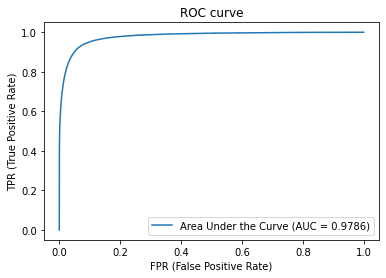

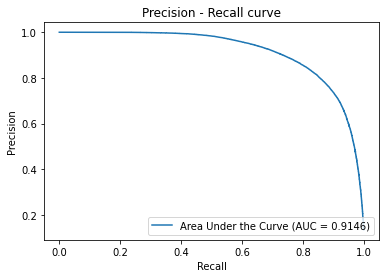

In [10]:
import numpy as np
import configparser
from matplotlib import pyplot as plt
#Keras
from keras.models import model_from_json
from keras.models import Model
#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import sys
sys.path.insert(0, './lib/')
# help_functions.py

#========= CONFIG FILE TO READ FROM =======
config = configparser.RawConfigParser()
config.read('configuration.txt')
#===========================================
#run the training on invariant or local
path_data = config.get('data paths', 'path_local')

#original test images (for FOV selection)
DRIVE_test_imgs_original = path_data + config.get('data paths', 'test_imgs_original')
test_imgs_orig = load_hdf5(DRIVE_test_imgs_original)
full_img_height = test_imgs_orig.shape[2]
full_img_width = test_imgs_orig.shape[3]
#the border masks provided by the DRIVE
DRIVE_test_border_masks = path_data + config.get('data paths', 'test_border_masks')
test_border_masks = load_hdf5(DRIVE_test_border_masks)
# dimension of the patches
patch_height = int(config.get('data attributes', 'patch_height'))
patch_width = int(config.get('data attributes', 'patch_width'))
#the stride in case output with average
stride_height = int(config.get('testing settings', 'stride_height'))
stride_width = int(config.get('testing settings', 'stride_width'))
assert (stride_height < patch_height and stride_width < patch_width)
#model name
name_experiment = config.get('experiment name', 'name')
path_experiment = './' +name_experiment +'/'
#N full images to be predicted
Imgs_to_test = int(config.get('testing settings', 'full_images_to_test'))
#Grouping of the predicted images
N_visual = int(config.get('testing settings', 'N_group_visual'))
#====== average mode ===========
average_mode = config.getboolean('testing settings', 'average_mode')

# #ground truth
# gtruth= path_data + config.get('data paths', 'test_groundTruth')
# img_truth= load_hdf5(gtruth)
# visualize(group_images(test_imgs_orig[0:20,:,:,:],5),'original')#.show()
# visualize(group_images(test_border_masks[0:20,:,:,:],5),'borders')#.show()
# visualize(group_images(img_truth[0:20,:,:,:],5),'gtruth')#.show()

#============ Load the data and divide in patches
patches_imgs_test = None
new_height = None
new_width = None
masks_test  = None
patches_masks_test = None
if average_mode == True:
    patches_imgs_test, new_height, new_width, masks_test = get_data_testing_overlap(
        DRIVE_test_imgs_original = DRIVE_test_imgs_original,  #original
        DRIVE_test_groudTruth = path_data + config.get('data paths', 'test_groundTruth'),  #masks
        Imgs_to_test = int(config.get('testing settings', 'full_images_to_test')),
        patch_height = patch_height,
        patch_width = patch_width,
        stride_height = stride_height,
        stride_width = stride_width
    )
else:
    patches_imgs_test, patches_masks_test = get_data_testing(
        DRIVE_test_imgs_original = DRIVE_test_imgs_original,  #original
        DRIVE_test_groudTruth = path_data + config.get('data paths', 'test_groundTruth'),  #masks
        Imgs_to_test = int(config.get('testing settings', 'full_images_to_test')),
        patch_height = patch_height,
        patch_width = patch_width,
    )

#================ Run the prediction of the patches ==================================
best_last = config.get('testing settings', 'best_last')
#Load the saved model
model = model_from_json(open('/content/'+name_experiment +'_architecture.json').read(),custom_objects={'DropBlock2D':DropBlock2D})
model.load_weights(path_experiment+name_experiment + '_'+best_last+'_weights.h5')
#Calculate the predictions
predictions = model.predict(patches_imgs_test, batch_size=32, verbose=2)
print ("predicted images size :")
print (predictions.shape)

#===== Convert the prediction arrays in corresponding images
pred_patches = pred_to_imgs(predictions, patch_height, patch_width, "original")

#========== Elaborate and visualize the predicted images ====================
pred_imgs = None
orig_imgs = None
gtruth_masks = None
if average_mode == True:
    pred_imgs = recompone_overlap(pred_patches, new_height, new_width, stride_height, stride_width)# predictions
    orig_imgs = my_PreProc(test_imgs_orig[0:pred_imgs.shape[0],:,:,:])    #originals
    gtruth_masks = masks_test  #ground truth masks
else:
    pred_imgs = recompone(pred_patches,13,12)       # predictions
    orig_imgs = recompone(patches_imgs_test,13,12)  # originals
    gtruth_masks = recompone(patches_masks_test,13,12)  #masks
# apply the DRIVE masks on the repdictions #set everything outside the FOV to zero!!
kill_border(pred_imgs, test_border_masks)  #DRIVE MASK  #only for visualization
## back to original dimensions
orig_imgs = orig_imgs[:,:,0:full_img_height,0:full_img_width]
pred_imgs = pred_imgs[:,:,0:full_img_height,0:full_img_width]
gtruth_masks = gtruth_masks[:,:,0:full_img_height,0:full_img_width]
print ("Orig imgs shape: " +str(orig_imgs.shape))
print ("pred imgs shape: " +str(pred_imgs.shape))
print ("Gtruth imgs shape: " +str(gtruth_masks.shape))
visualize(group_images(orig_imgs,N_visual),path_experiment+"all_originals")#.show()
visualize(group_images(pred_imgs,N_visual),path_experiment+"all_predictions")#.show()
visualize(group_images(gtruth_masks,N_visual),path_experiment+"all_groundTruths")#.show()
#visualize results comparing mask and prediction:
assert (orig_imgs.shape[0]==pred_imgs.shape[0] and orig_imgs.shape[0]==gtruth_masks.shape[0])
N_predicted = orig_imgs.shape[0]
group = N_visual
assert (N_predicted%group==0)
for i in range(int(N_predicted/group)):
    orig_stripe = group_images(orig_imgs[i*group:(i*group)+group,:,:,:],group)
    masks_stripe = group_images(gtruth_masks[i*group:(i*group)+group,:,:,:],group)
    pred_stripe = group_images(pred_imgs[i*group:(i*group)+group,:,:,:],group)
    total_img = np.concatenate((orig_stripe,masks_stripe,pred_stripe),axis=0)
    visualize(total_img,path_experiment+name_experiment +"_Original_GroundTruth_Prediction"+str(i))#.show()

#====== Evaluate the results
print ("\n\n========  Evaluate the results =======================")
#predictions only inside the FOV
y_scores, y_true = pred_only_FOV(pred_imgs,gtruth_masks, test_border_masks)  #returns data only inside the FOV
print ("Calculating results only inside the FOV:")
print ("y scores pixels: " +str(y_scores.shape[0]) +" (radius 270: 270*270*3.14==228906), including background around retina: " +str(pred_imgs.shape[0]*pred_imgs.shape[2]*pred_imgs.shape[3]) +" (584*565==329960)")
print ("y true pixels: " +str(y_true.shape[0]) +" (radius 270: 270*270*3.14==228906), including background around retina: " +str(gtruth_masks.shape[2]*gtruth_masks.shape[3]*gtruth_masks.shape[0])+" (584*565==329960)"
)
#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
# test_integral = np.trapz(tpr,fpr) #trapz is numpy integration
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
plt.savefig(path_experiment+"ROC.png")

#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0]  #so the array is increasing (you won't get negative AUC)
recall = np.fliplr([recall])[0]  #so the array is increasing (you won't get negative AUC)
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.savefig(path_experiment+"Precision_recall.png")

#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))

#Save the results
file_perf = open(path_experiment+'performances.txt', 'w')
file_perf.write("Area under the ROC curve: "+str(AUC_ROC)
                + "\nArea under Precision-Recall curve: " +str(AUC_prec_rec)
                + "\nJaccard similarity score: " +str(jaccard_index)
                + "\nF1 score (F-measure): " +str(F1_score)
                +"\n\nConfusion matrix:"
                +str(confusion)
                +"\nACCURACY: " +str(accuracy)
                +"\nSENSITIVITY: " +str(sensitivity)
                +"\nSPECIFICITY: " +str(specificity)
                +"\nPRECISION: " +str(precision)
                )
file_perf.close()  